In [1]:
import numpy as np
import rasterio
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage.segmentation import find_boundaries

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
with rasterio.open('../tests/sample1_chm_pitfree.tif', nodata=-9999) as src:
    image = src.read(1, masked=True)

In [4]:
image_gt2m = np.ma.masked_where(image < 2, image)
local_maxi = peak_local_max(image_gt2m, indices=False, min_distance=6) # resolution is 0.33 m, so look for maxima within 2m
markers = ndi.label(local_maxi)[0]
labels = watershed(-image_gt2m, markers, mask=~image_gt2m.mask)
foreground = np.ma.masked_where(labels <= 0, labels)

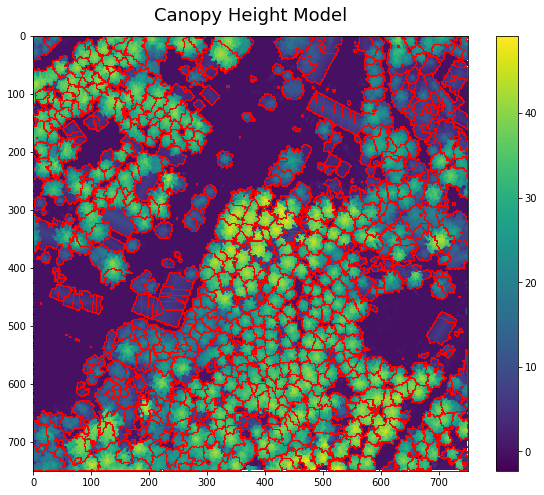

In [22]:
plt.figure(figsize=(10,8))
plt.imshow(image, cmap='viridis')
plt.colorbar()

boundaries = find_boundaries(labels, mode='thick', connectivity=2)
draw_boundaries = np.ma.masked_where(~boundaries,boundaries)
plt.imshow(draw_boundaries, cmap=ListedColormap('red'))
plt.title('Canopy Height Model', fontsize=18, pad=15);